In [1]:
import warnings
warnings.filterwarnings('ignore')

<h1><center>HOTEL RECOMMENDATION SYSTEM</center></h1>

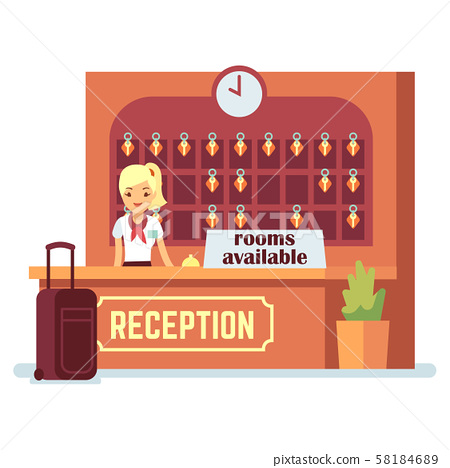

# INTRODUCTION

<h3 style="color:#a000c8">A<i> <u>Content-Based Recommender System</u></i> ,that recommends Hotels with higher ratings similar to the Hotel the user <br><br>likes and the location preferred.</h3> 

# OBJECTIVE

<li>The First Step while planning a Trip is to book good Hotels.</li><br>
<li>Therefore,Lets Build a recommendation system that recommends hotels based on customer reviews and ratings.</li><br>
<li>There are many websites which follow this recommender system and its very important system followed in many Internet Sites.</li><br>
<li>This recommendation system recommends  Best curated Hotels  based on other customers ratings.</li><br>
<li>This system will help us find best hotel for our need.</li><br></ul>

<h3>HOTEL RECOMMENDATION MODEL</h3>

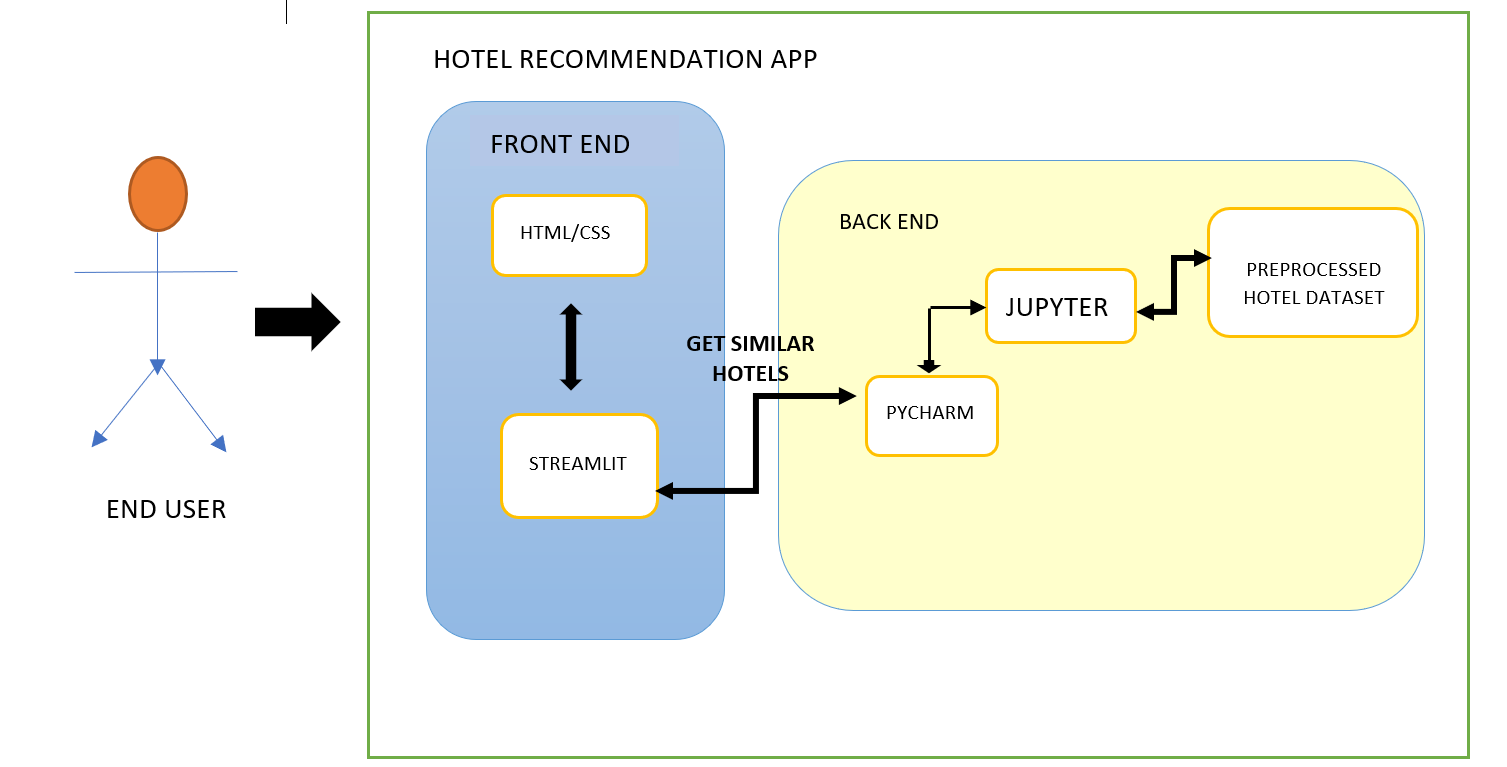

In [2]:
#Importing necessary libraries for Data Cleaning,Data Analysis,Data Preprocessing,Model Building

In [3]:
#Importing Natural Language Processing Libraries as we will be dealing with Processing of texts.

In [4]:
import nltk
nltk.download('wordnet')
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from ast import literal_eval



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hemac\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
#Importing Folium which will be useful TO visualize the hotel distribution in various cities around the Indian Subcontinent

In [6]:
 !pip install folium

Defaulting to user installation because normal site-packages is not writeable


# LIFE CYCLE OF A DATA SCIENCE PROJECT:

<li style="color:#a000c8"><b>Exploratory Data Analysis(EDA)</b></li><br>
<li style="color:#a000c8"><b> Feature Engineering</li></b><br>
<li style="color:#a000c8"><b>Feature Selection</li></b><br>
<li style="color:#a000c8"><b>Model Building</li></b><br>
<li style="color:#a000c8"><b>Deployment</li></b><br>


<h3 style="color:black">As First Step of Exploratory Data Analysis lets upload the Hotel Dataset downloaded from Kaggle.</h3>

In [7]:
#Importing Data Set of various Hotels around India from Goibibo Website which is a famous online Hotel Booking Site

In [8]:
Hotel = pd.read_csv("goibibo_com-travel_sample.csv")

# 1 EXPLORATORY DATA ANALYSIS(EDA):

<h3 style="color:#a000c8">Exploratory Data Analysis (EDA) is used to analyze the datasets and by this, we summarize their main importance.</H3> 

In [9]:
#Calling the DataFrame to visualize various columns in the dataframe

In [10]:
Hotel

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,https://www.goibibo.com/hotels/woodchime-homes...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,https://www.goibibo.com/hotels/stepinn-iffco-c...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,https://www.goibibo.com/hotels/sunrise-beach-r...,2.0,2.5,Service Quality::2.5|Amenities::2.5|Food and D...,goibibo,Goa,9b59d00eaffc273d83000ed7dcda0e83
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,24,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,https://www.goibibo.com/hotels/green-cottages-...,1.0,5.0,Service Quality::5.0|Amenities::5.0|Food and D...,goibibo,Himachal Pradesh,df0971f9c5501af112485ee28b468ce5
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,20,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,https://www.goibibo.com/hotels/delhi-continent...,121.0,2.8,Service Quality::2.7|Amenities::2.6|Food and D...,goibibo,Delhi,0c3514344c9cda8718f558e84bdb44ef
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Room Service,"Vijayvargiya Tower,Tower Chowk, Ujjain (M.P.)",Freeganj Area,Ujjain,India,2016-06-26,NaN,NaN,regular,The standard check-in time is 12:00 PM and the...,...,10,NaN,Two bed AC Room,https://www.goibibo.com/hotels/avantika-hotel-...,NaN,NaN,Service Quality::|Amenities::|Food and Drinks:...,goibibo,Madhya Pradesh,9e59170d5f79ebb7b590ed339e3762a4
3996,Room Service,"Anjali Circle ,Opposite Petrol Pump,Vasna Road",Ellis Bridge Area,Ahmedabad,India,2016-06-26,NaN,NaN,regular,The standard check-in time is 02:00 PM and the...,...,12,Room Service |Air Conditioning |Basic Bathroom...,Non AC Room,https://www.goibibo.com/hotels/heritage-hotel-...,NaN,NaN,Service Quality::|Amenities::|Food and Drinks:...,goibibo,Gujarat,c0f3e4dac166df972277c86243b27560
3997,Room Service|Restaurant,"Marol Maroshi Road, Near To Marol naka FireBri...",Andheri,Mumbai,India,2016-06-26,83.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,41,Air Conditioning |Cable / Satellite / Pay TV a...,Gold Room,https://www.goibibo.com/hotels/marigold-reside...,77.0,4.0,Service Quality::3.9|Amenities::3.8|Food and D...,goibibo,Maharashtra,38b95f3e67046131254d3e2106b9d8fa
3998,Room Service,"Station Road, B Deoghar Ho, Deoghar Jharkhand",Railway Station Road,Deoghar,India,2016-06-26,NaN,NaN,regular,The standard check-in time is 02:00 PM and the...,...,4,Room Service |Air Conditioning |Alarm Clock|Ba...,AC DELUXE ROOM,https://www.goibibo.com/hotels/yashoda-interna...,NaN,NaN,Service Quality::|Amenities::|Food and Drinks:...,goibibo,Jharkhand,eb8597d68508134dedc811c2a4fc42b4


In [11]:
#shape attribute in Pandas enables us to obtain the shape of the Hotel DataFrame

In [12]:
Hotel.shape

(4000, 36)

In [13]:
#No.of Rows=4000
#No.of Columns=36

In [14]:
#  '.columns' attribute to return the column labels of the Hotel dataframe.

In [15]:
Hotel.columns

Index(['additional_info', 'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id'],
      dtype='object')

In [16]:
#  info() method prints information about the Hotel DataFrame.

#The information contains the number of columns, column labels, column data types, memory usage, range index,
#and the number of cells in each column (non-null values).


In [17]:
Hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   additional_info           3192 non-null   object 
 1   address                   4000 non-null   object 
 2   area                      3965 non-null   object 
 3   city                      4000 non-null   object 
 4   country                   4000 non-null   object 
 5   crawl_date                4000 non-null   object 
 6   guest_recommendation      2416 non-null   float64
 7   hotel_brand               389 non-null    object 
 8   hotel_category            4000 non-null   object 
 9   hotel_description         3983 non-null   object 
 10  hotel_facilities          3806 non-null   object 
 11  hotel_star_rating         4000 non-null   int64  
 12  image_count               4000 non-null   int64  
 13  latitude                  4000 non-null   float64
 14  locality

# Data Visualization

<h3 style="color:#a000c8">Data visualization is the graphical representation of information and data.<br><br> By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.</h3>

<li>Lets do in depth analysis of the data set and visualize the columns and their relationship with each other. </li><br>
<li>We will do these analysis by making use of libraries from Python.</li><br>
<li>we will explore this dataset, a detailed sample of the hotels listed on Goibibo.</li><br>
<li>We will probe the basic dataset attributes and hopefully uncover some interesting effects from the data.</li><br>
<li>Let's take a look at some top-level variables, then drill down a little bit into particulars.</li><br>


<h3>HOTEL STAR RATINGS :</h3>

In [18]:
#Lets Visualize how many hotels fall under which rating caregories.

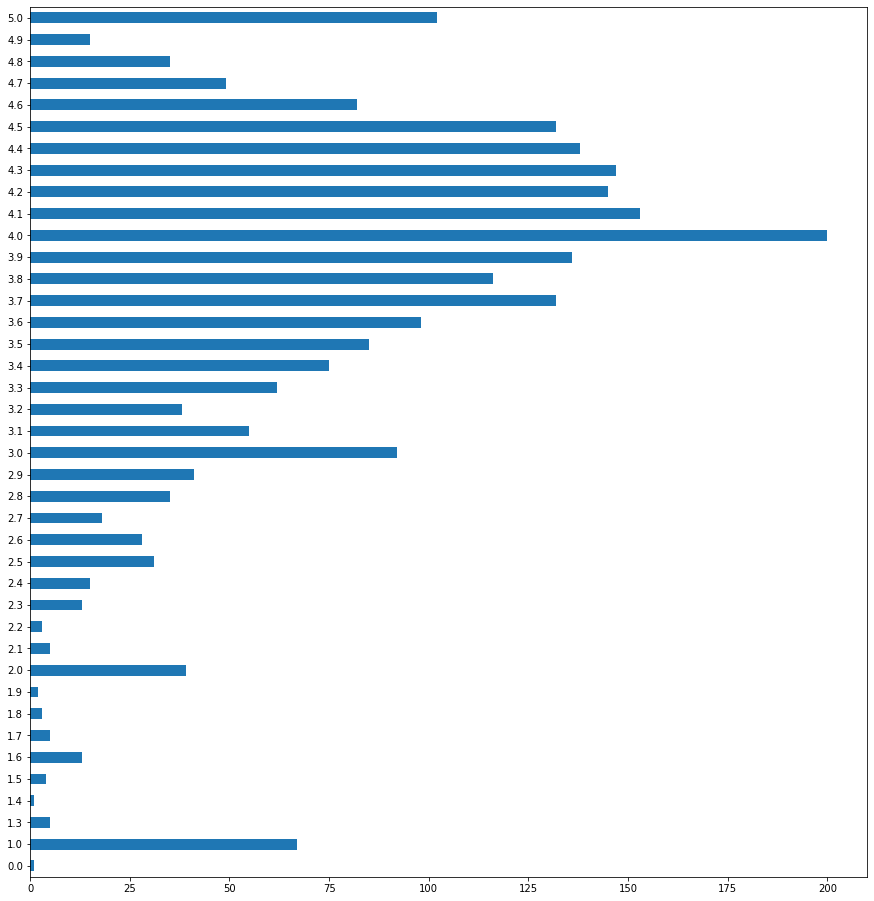

In [19]:
import matplotlib.pyplot as plt
Hotel.site_review_rating.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

<li>We can see above that  the Site reviews are heavily skewed towards 4 stars.</li> <li>This is actually pretty much standard across every platform on the web that does ratings.</li>

<h3>HOTEL STAR RATINGS AND REVIEWS :</h3>


<li>Let's take a look at some top-level variables, then drill down a little bit into particulars.</li>

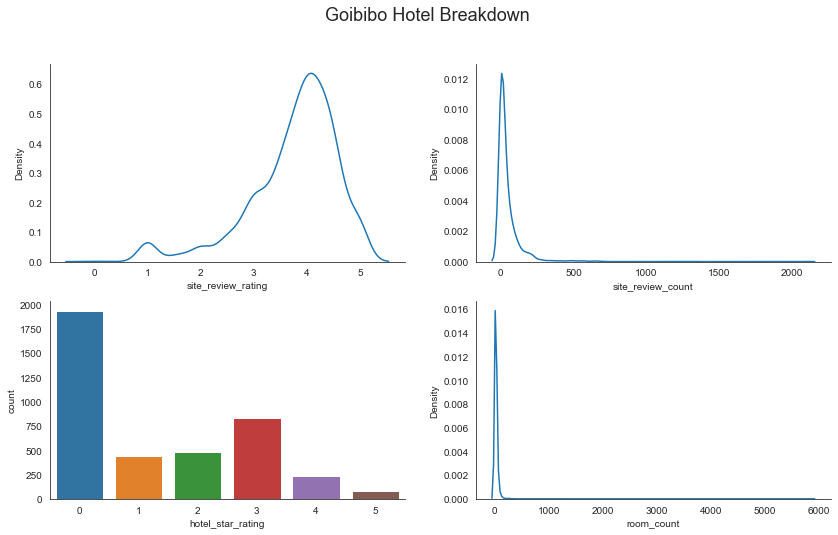

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

f, axarr = plt.subplots(2, 2, figsize=(14, 8))
plt.suptitle('Goibibo Hotel Breakdown', fontsize=18)

sns.kdeplot(Hotel['site_review_rating'], ax=axarr[0][0])
sns.kdeplot(Hotel['site_review_count'], ax=axarr[0][1])
sns.countplot(Hotel['hotel_star_rating'], ax=axarr[1][0])
sns.kdeplot(Hotel['room_count'], ax=axarr[1][1])

sns.despine()

<li>Review counts and room counts are very similar as they almost peak at same range, with a very long tail of extremely large hotels with much larger numbers of rooms and reviews.</li><br>

<li>It is also possible that some of the review totals are inflated; paid-for reviews are a well-known issue on sites like this, and this phenomenon will most likely be especially prevalent in India.</li>

<h3>CORRELATION BETWEEN HOTEL STAR RATINGS AND HOTEL RATINGS:</h3>

Lets check whether a particular Hotel’s Star Ratings has an impact on that Hotel’s  review ratings in the Website.

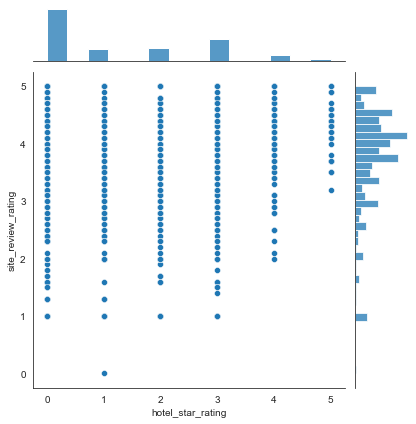

In [21]:
sns.jointplot(Hotel.hotel_star_rating, Hotel.site_review_rating)

<li>We can clearly see from above plot that Hotels with Higher Star ratings has good reviews. </li><br>
<li>4-star and especially 5-star hotels have significantly better ratings than lower-starred options. </li><br>
<li>As a rule of thumb, staying at a 3-minus-star hotel risks having a terrible experience; staying at a 4-star hotels means you will have at a minimum an unsatisfactory experience (2/5 rating); and staying at a 5-star hotel guarantees you will have at least an ok experience (3/5 rating).</li>


<h3>HOTEL LOCATIONS</h3>

<li>Lets visualize the various Hotel Distribution in India </li>
<li>Lets take a look at the strength of hotels in every region of Indian Subcontinent.</li>



In [22]:
hotels_lat_long = Hotel.groupby('city').first().loc[:, ['longitude', 'latitude']].assign(
    n_hotels = Hotel.groupby('city').area.count(),
    n_reviews = (Hotel.assign(site_review_count=Hotel.site_review_count.fillna(0))\
                 .groupby('city').site_review_count.sum())
)

In [23]:
import folium

m = folium.Map(
    location=[21.15, 79.09],
    zoom_start=4
)

max_n_hotels = hotels_lat_long.n_hotels.max()

hotels_lat_long.apply(lambda ll: folium.Circle(radius=200000 * (ll.n_hotels / max_n_hotels),
                                               location=[ll.latitude, ll.longitude],
                                               fill=True,
                                               color='red',
                                               popup=ll.name).add_to(m), axis='columns')
m

<li>As we can see from the above map that the Hotels are  not uniformly distributed all over the country.</li><br>
<li>We could see maximum number of Hotel’s are situated mostly in Metropolitan Cities, Tourist Places like Goa etc., Where majority of people population is distributed.</li><br>
<li>The number of hotels in a city is strongly, but not entirely, dependent on the city's size occurrence even small city such has Goa has more Hotel’s than rest of the places
as it’s a Tourist place.</li>


In [24]:
#Removing the pipe delimiter from review_count_by_category by using helper function

In [25]:
import numpy as np

# Helper functions for encoding.
def split_piped_list(srs, col):
    try:
        ret = [r.split("::")[-1] for r in srs[col].split("|")]
        ret = [float(r) if len(r) > 0 else np.nan for r in ret]
        return ret
    except AttributeError:
        return np.nan

<h3>SENTIMENT OF REVIEWS</h3>

<li>•	Lets look at the Sentiment analysis of the Hotel Data set by plotting the Positive to negative review ratio using a Violin Plot from Seaborn.</li>

In [26]:
# Encode the reviews column into separate columns.
review_counts = pd.DataFrame(
    data=(
        Hotel
            .apply(lambda h: split_piped_list(h, 'review_count_by_category'), axis='columns')
            .map(lambda v: [0, 0, 0] if isinstance(v, float) else v).tolist()
    ),
    columns=['positive_reviews_total', 'critical_reviews_total', 'reviews_with_images_total']
)
Hotel = Hotel.join(review_counts)

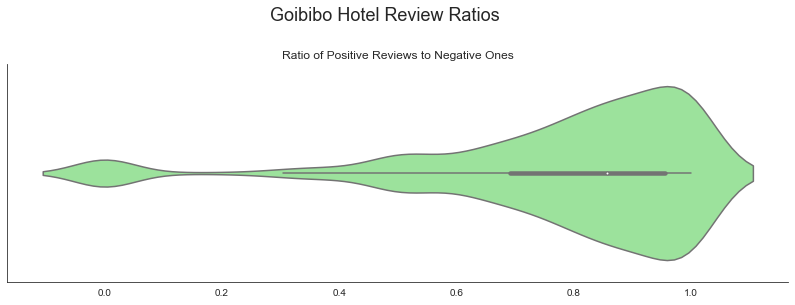

In [27]:
f, axarr = plt.subplots(1, 1, figsize=(14, 4))

sns.violinplot(Hotel.positive_reviews_total / (Hotel.positive_reviews_total + Hotel.critical_reviews_total), color='lightgreen')


axarr.set_title("Ratio of Positive Reviews to Negative Ones")

plt.suptitle('Goibibo Hotel Review Ratios', fontsize=18, y=1.08)

sns.despine()

<li>Positive reviews the norm.</li><br><li> 75% of hotels have a 75%-or-better positive review ratio.</li>

# 2 FEATURE ENGINEERING:

<h3 style="color:#a000c8">Feature Engineering is the process of extract features from raw data with some domain knowledge.</h3>

# Data Cleaning


#  Dropping Unnecessary Columns

<li>This DataFrame  contains many columns which will not be useful for our analysis. Such columns should be dropped from the DataFrame to make it easier to focus on the main columns.</li><br>
<li> The columns can be removed by specifying label names and corresponding axis, or by specifying index or column names directly. </li>

In [28]:
# crawl_date
# guest_recommendation
# hotel_brand
# hotel_category
# hotel_description
# hotel_star_rating
# image_count
# latitude
# locality
# longitude
# pageurl
# point_of_interest
# property_type
# province
# qts
# query_time_stamp
# room_area
# room_count
# similar_hotel
# site_review_count
# site_stay_review_rating
# sitename
# uniq_id

<li>Selecting necessary Features which will help us in recommendation</li>

# 3 FEATURE SELECTION:

<h3 style="color:#a000c8">Feature Selection where we select those features that will give a high impact on the model.</h3>

In [29]:
# recommendation will be based on these features only
Hotel = Hotel[['property_id','property_name','additional_info','address','area','city','room_facilities','room_type','site_review_rating','state']]

In [30]:
Hotel.head()

,property_id,property_name,additional_info,address,area,city,room_facilities,room_type,site_review_rating,state
0,HTLGBO1000016238,Baragarh Regency,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,4.0,Himachal Pradesh
1,HTLGBO1000015822,Asian Suites A- 585,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,4.5,Haryana
2,HTLGBO1000004551,Bevvan Resort,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,Room Service |Air Conditioning |Cable / Satell...,Standard Room,2.5,Goa
3,HTLGBO1000007993,Apple Inn Cottage,NaN,Simsa,Village Simsa,Manali,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,5.0,Himachal Pradesh
4,HTLGBO1000008281,Anmol Hotel Pvt.Ltd,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,2.8,Delhi


# Drop Null Values

<li>Using isnull() method to check whether we have empty values and then obtain the sum of them.</li>

In [31]:
Hotel.isnull().sum()


property_id              0
property_name            0
additional_info        808
address                  0
area                    35
city                     0
room_facilities        270
room_type                0
site_review_rating    1584
state                    0
dtype: int64

<li>Area</li> 
<li>room_facilities </li>
<li>site_review_rating </li> has null values. Must analyze and take decision how to handle these missing datas</p>

In [32]:
# Handling the Null values of Area and room_facilities by replacing the string 'Unknown' in place of empty values


In [33]:
Hotel['additional_info'] = Hotel['additional_info'].replace(np.nan, 'unknown')
Hotel['area'] = Hotel['area'].replace(np.nan, 'unknown')
Hotel['room_facilities'] = Hotel['room_facilities'].replace(np.nan, 'unknown')



In [34]:
#Handling missing value of site_review_rating by replacing it with '0'

In [35]:
Hotel['site_review_rating'] = Hotel['site_review_rating'].replace(np.nan, 0)

<li>We can see from below dataframe that the null values are completely been handled and now our data is ready to be computed.</li>

In [36]:
Hotel

,property_id,property_name,additional_info,address,area,city,room_facilities,room_type,site_review_rating,state
0,HTLGBO1000016238,Baragarh Regency,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,4.0,Himachal Pradesh
1,HTLGBO1000015822,Asian Suites A- 585,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,4.5,Haryana
2,HTLGBO1000004551,Bevvan Resort,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,Room Service |Air Conditioning |Cable / Satell...,Standard Room,2.5,Goa
3,HTLGBO1000007993,Apple Inn Cottage,unknown,Simsa,Village Simsa,Manali,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,5.0,Himachal Pradesh
4,HTLGBO1000008281,Anmol Hotel Pvt.Ltd,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,2.8,Delhi
...,...,...,...,...,...,...,...,...,...,...
3995,HTLGBO1000087842,Hotel Shreenath Palace,Room Service,"Vijayvargiya Tower,Tower Chowk, Ujjain (M.P.)",Freeganj Area,Ujjain,unknown,Two bed AC Room,0.0,Madhya Pradesh
3996,HTLGBO1000058558,Hotel Sarvottam,Room Service,"Anjali Circle ,Opposite Petrol Pump,Vasna Road",Ellis Bridge Area,Ahmedabad,Room Service |Air Conditioning |Basic Bathroom...,Non AC Room,0.0,Gujarat
3997,HTLGBO1000001584,Hotel Silver Inn,Room Service|Restaurant,"Marol Maroshi Road, Near To Marol naka FireBri...",Andheri,Mumbai,Air Conditioning |Cable / Satellite / Pay TV a...,Gold Room,4.0,Maharashtra
3998,HTLGBO1000085234,Hotel Shivam International,Room Service,"Station Road, B Deoghar Ho, Deoghar Jharkhand",Railway Station Road,Deoghar,Room Service |Air Conditioning |Alarm Clock|Ba...,AC DELUXE ROOM,0.0,Jharkhand


# Remove Duplicated Values

<li> 'duplicated()' method helps us to Check whether the values of dataframe are repeated and if yes remove them.</li>

In [37]:
Hotel.duplicated().sum()

0

In [38]:
# No Duplicate Values in the dataset

In [39]:
Hotel.describe()

,site_review_rating
count,4000.00000
mean,2.26560
std,1.94812
min,0.00000
25%,0.00000
50%,3.00000
75%,4.00000
max,5.00000


# Data Processing

<h3 style="color:#a000c8">Converting data into appropriate format for building machine learning models</h3>

In [40]:
Hotel.head()

,property_id,property_name,additional_info,address,area,city,room_facilities,room_type,site_review_rating,state
0,HTLGBO1000016238,Baragarh Regency,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,4.0,Himachal Pradesh
1,HTLGBO1000015822,Asian Suites A- 585,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,4.5,Haryana
2,HTLGBO1000004551,Bevvan Resort,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,Room Service |Air Conditioning |Cable / Satell...,Standard Room,2.5,Goa
3,HTLGBO1000007993,Apple Inn Cottage,unknown,Simsa,Village Simsa,Manali,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,5.0,Himachal Pradesh
4,HTLGBO1000008281,Anmol Hotel Pvt.Ltd,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,2.8,Delhi


<li> Now our aim is to convert the columns into appropriate and same format to account for merging of columns.</li>

In [41]:
#Column 'additional_info' and 'room_type' has pipe separator .We will make use of helper function to remove the separator

In [42]:
#Helper Function

def Convert(string):
    li = list(string.split("|"))
    return li


In [43]:
Hotel['additional_info'] = Hotel['additional_info'].apply(Convert)
Hotel['room_facilities'] = Hotel['room_facilities'].apply(Convert)

<li>As clearly observed below the separator from the additional_info and 'room facilities' columns are removed successfully.</li>

In [44]:
Hotel

,property_id,property_name,additional_info,address,area,city,room_facilities,room_type,site_review_rating,state
0,HTLGBO1000016238,Baragarh Regency,"[Room Service, Internet Access, Restaurant, Fr...","15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,"[Room Service , Basic Bathroom Amenities, Cabl...",Deluxe Room,4.0,Himachal Pradesh
1,HTLGBO1000015822,Asian Suites A- 585,"[Room Service, Gym/Spa]","A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,"[Room Service , Air Conditioning , Basic Bathr...",Deluxe Room With Free WIFI,4.5,Haryana
2,HTLGBO1000004551,Bevvan Resort,"[Restaurant, Swimming Pool]","Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,"[Room Service , Air Conditioning , Cable / Sat...",Standard Room,2.5,Goa
3,HTLGBO1000007993,Apple Inn Cottage,[unknown],Simsa,Village Simsa,Manali,"[Basic Bathroom Amenities, Cable / Satellite /...",Deluxe Room,5.0,Himachal Pradesh
4,HTLGBO1000008281,Anmol Hotel Pvt.Ltd,"[Internet Access, Restaurant]","8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,"[Basic Bathroom Amenities, Cable / Satellite /...",Standard Room Non AC,2.8,Delhi
...,...,...,...,...,...,...,...,...,...,...
3995,HTLGBO1000087842,Hotel Shreenath Palace,[Room Service],"Vijayvargiya Tower,Tower Chowk, Ujjain (M.P.)",Freeganj Area,Ujjain,[unknown],Two bed AC Room,0.0,Madhya Pradesh
3996,HTLGBO1000058558,Hotel Sarvottam,[Room Service],"Anjali Circle ,Opposite Petrol Pump,Vasna Road",Ellis Bridge Area,Ahmedabad,"[Room Service , Air Conditioning , Basic Bathr...",Non AC Room,0.0,Gujarat
3997,HTLGBO1000001584,Hotel Silver Inn,"[Room Service, Restaurant]","Marol Maroshi Road, Near To Marol naka FireBri...",Andheri,Mumbai,"[Air Conditioning , Cable / Satellite / Pay TV...",Gold Room,4.0,Maharashtra
3998,HTLGBO1000085234,Hotel Shivam International,[Room Service],"Station Road, B Deoghar Ho, Deoghar Jharkhand",Railway Station Road,Deoghar,"[Room Service , Air Conditioning , Alarm Clock...",AC DELUXE ROOM,0.0,Jharkhand


<li>Now we have to convert the string columns 'area' ,'city' ,'room_type' ,'state' ,'address' to list to maintain same format as rest of the columns which will facilitate for merging them later .</li>

In [45]:
#Using helper function convert to convert string to List

In [46]:
def Convert(string):
    li = list(string.split(","))
    return li

In [47]:
Hotel['area'] = Hotel['area'].apply(Convert)
Hotel['city'] = Hotel['city'].apply(Convert)
Hotel['room_type'] = Hotel['room_type'].apply(Convert)
Hotel['state'] = Hotel['state'].apply(Convert)
Hotel['address']=Hotel['address'].apply(Convert)

<li>As we can clearly see from below data all our necessary columns for merging have been converted into List and are of same format.</li>

In [48]:
Hotel.head()

,property_id,property_name,additional_info,address,area,city,room_facilities,room_type,site_review_rating,state
0,HTLGBO1000016238,Baragarh Regency,"[Room Service, Internet Access, Restaurant, Fr...","[15th Mile, N.H.21, Manali, District Kullu, ...",[Others],[Manali],"[Room Service , Basic Bathroom Amenities, Cabl...",[Deluxe Room],4.0,[Himachal Pradesh]
1,HTLGBO1000015822,Asian Suites A- 585,"[Room Service, Gym/Spa]","[A-585, Sushant Lok-1 , Near Iffco Chowk Metr...",[Sushant Lok],[Gurgaon],"[Room Service , Air Conditioning , Basic Bathr...",[Deluxe Room With Free WIFI],4.5,[Haryana]
2,HTLGBO1000004551,Bevvan Resort,"[Restaurant, Swimming Pool]","[Cobra Vaddo, Calungate Baga Road, Bardez, C...",[Calangute Area],[Goa],"[Room Service , Air Conditioning , Cable / Sat...",[Standard Room],2.5,[Goa]
3,HTLGBO1000007993,Apple Inn Cottage,[unknown],[Simsa],[Village Simsa],[Manali],"[Basic Bathroom Amenities, Cable / Satellite /...",[Deluxe Room],5.0,[Himachal Pradesh]
4,HTLGBO1000008281,Anmol Hotel Pvt.Ltd,"[Internet Access, Restaurant]","[8180 Street No.-6, Arakashan Road, Paharganj]",[Paharganj],[Delhi],"[Basic Bathroom Amenities, Cable / Satellite /...",[Standard Room Non AC],2.8,[Delhi]


<li>Now lets join words to a single word as they represent the same meaning which will help while applying algorithm</li>

In [49]:
#Helper function collapse is used to bridge the gaps between two words

In [50]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [51]:
Hotel['additional_info'] = Hotel['additional_info'].apply(collapse)
Hotel['address'] = Hotel['address'].apply(collapse)
Hotel['room_facilities'] = Hotel['room_facilities'].apply(collapse)
Hotel['room_type'] = Hotel['room_type'].apply(collapse)
Hotel['state'] = Hotel['state'].apply(collapse)


<li>Now we can see  below ,that the gap is removed between two words which points to same meaning. </li>

In [52]:
Hotel.head()

,property_id,property_name,additional_info,address,area,city,room_facilities,room_type,site_review_rating,state
0,HTLGBO1000016238,Baragarh Regency,"[RoomService, InternetAccess, Restaurant, Free...","[15thMile, N.H.21, Manali, DistrictKullu, Hima...",[Others],[Manali],"[RoomService, BasicBathroomAmenities, Cable/Sa...",[DeluxeRoom],4.0,[HimachalPradesh]
1,HTLGBO1000015822,Asian Suites A- 585,"[RoomService, Gym/Spa]","[A-585, SushantLok-1, NearIffcoChowkMetroStati...",[Sushant Lok],[Gurgaon],"[RoomService, AirConditioning, BasicBathroomAm...",[DeluxeRoomWithFreeWIFI],4.5,[Haryana]
2,HTLGBO1000004551,Bevvan Resort,"[Restaurant, SwimmingPool]","[CobraVaddo, CalungateBagaRoad, Bardez, Calang...",[Calangute Area],[Goa],"[RoomService, AirConditioning, Cable/Satellite...",[StandardRoom],2.5,[Goa]
3,HTLGBO1000007993,Apple Inn Cottage,[unknown],[Simsa],[Village Simsa],[Manali],"[BasicBathroomAmenities, Cable/Satellite/PayTV...",[DeluxeRoom],5.0,[HimachalPradesh]
4,HTLGBO1000008281,Anmol Hotel Pvt.Ltd,"[InternetAccess, Restaurant]","[8180StreetNo.-6, ArakashanRoad, Paharganj]",[Paharganj],[Delhi],"[BasicBathroomAmenities, Cable/Satellite/PayTV...",[StandardRoomNonAC],2.8,[Delhi]


<li>As we can clearly see from below data all our necessary columns for merging have been converted into List and are of same format.</li>

<li>Merging the columns 'additional_info' , 'room_facilities' ,'room_type','city','area','state' to a single column 'Tags' which in future helps us to traverse over the list and pickup matching features with that of User's input.</li>

In [53]:
Hotel['Tags'] = Hotel['additional_info'] + Hotel['room_facilities'] + Hotel['room_type'] + Hotel['address'] + Hotel['area']
Hotel['Location']=Hotel['city']

In [54]:
# Refer the below dataframe that a separate column named 'Tags' is formed with merged values 

In [55]:
Hotel.head()

,property_id,property_name,additional_info,address,area,city,room_facilities,room_type,site_review_rating,state,Tags,Location
0,HTLGBO1000016238,Baragarh Regency,"[RoomService, InternetAccess, Restaurant, Free...","[15thMile, N.H.21, Manali, DistrictKullu, Hima...",[Others],[Manali],"[RoomService, BasicBathroomAmenities, Cable/Sa...",[DeluxeRoom],4.0,[HimachalPradesh],"[RoomService, InternetAccess, Restaurant, Free...",[Manali]
1,HTLGBO1000015822,Asian Suites A- 585,"[RoomService, Gym/Spa]","[A-585, SushantLok-1, NearIffcoChowkMetroStati...",[Sushant Lok],[Gurgaon],"[RoomService, AirConditioning, BasicBathroomAm...",[DeluxeRoomWithFreeWIFI],4.5,[Haryana],"[RoomService, Gym/Spa, RoomService, AirConditi...",[Gurgaon]
2,HTLGBO1000004551,Bevvan Resort,"[Restaurant, SwimmingPool]","[CobraVaddo, CalungateBagaRoad, Bardez, Calang...",[Calangute Area],[Goa],"[RoomService, AirConditioning, Cable/Satellite...",[StandardRoom],2.5,[Goa],"[Restaurant, SwimmingPool, RoomService, AirCon...",[Goa]
3,HTLGBO1000007993,Apple Inn Cottage,[unknown],[Simsa],[Village Simsa],[Manali],"[BasicBathroomAmenities, Cable/Satellite/PayTV...",[DeluxeRoom],5.0,[HimachalPradesh],"[unknown, BasicBathroomAmenities, Cable/Satell...",[Manali]
4,HTLGBO1000008281,Anmol Hotel Pvt.Ltd,"[InternetAccess, Restaurant]","[8180StreetNo.-6, ArakashanRoad, Paharganj]",[Paharganj],[Delhi],"[BasicBathroomAmenities, Cable/Satellite/PayTV...",[StandardRoomNonAC],2.8,[Delhi],"[InternetAccess, Restaurant, BasicBathroomAmen...",[Delhi]


<li>Dropping the columns which we have merged previously.</li>

In [56]:
newHotel = Hotel.drop(columns=['additional_info','room_facilities','room_type','area','city','state'])


In [57]:
newHotel.head()

,property_id,property_name,address,site_review_rating,Tags,Location
0,HTLGBO1000016238,Baragarh Regency,"[15thMile, N.H.21, Manali, DistrictKullu, Hima...",4.0,"[RoomService, InternetAccess, Restaurant, Free...",[Manali]
1,HTLGBO1000015822,Asian Suites A- 585,"[A-585, SushantLok-1, NearIffcoChowkMetroStati...",4.5,"[RoomService, Gym/Spa, RoomService, AirConditi...",[Gurgaon]
2,HTLGBO1000004551,Bevvan Resort,"[CobraVaddo, CalungateBagaRoad, Bardez, Calang...",2.5,"[Restaurant, SwimmingPool, RoomService, AirCon...",[Goa]
3,HTLGBO1000007993,Apple Inn Cottage,[Simsa],5.0,"[unknown, BasicBathroomAmenities, Cable/Satell...",[Manali]
4,HTLGBO1000008281,Anmol Hotel Pvt.Ltd,"[8180StreetNo.-6, ArakashanRoad, Paharganj]",2.8,"[InternetAccess, Restaurant, BasicBathroomAmen...",[Delhi]


<li>Converting List into strings, Which will help us traverse along the words and extract similarity which will inturn recommend Hotels based on matching features with that of User's preference</li>

In [58]:
#Applying Lambda function to convert List to string

In [59]:
newHotel['Tags'] = newHotel['Tags'].apply(lambda x: " ".join(x))
newHotel['address'] = newHotel['address'].apply(lambda x: " ".join(x))
newHotel['Location'] = newHotel['Location'].apply(lambda x: " ".join(x))


In [60]:
newHotel['Tags'][0]

'RoomService InternetAccess Restaurant FreeInternet RoomService BasicBathroomAmenities Cable/Satellite/PayTVavailable CeilingFan HeatingFacility(onrequest) InternetConnectionInRoom Telephone ShowerFacilityAvailable BreakfastAvailable(surcharge) Hot/ColdRunningWater Housekeeping DeskinRoom ExtraBed,Towels,Linens,Bedding(onrequest) WindowOpens Makeup/ShavingMirror Safe-In-Room HillViewfromallRooms HD/LCDSatelliteTV SofaTable/ExtraSeats PrivateGarden TV Bathrobes Mirror GasCylinder-Chargeable LuggageRack AttachedBathroom BedsideTable ClothesHookinBathroom CompleteBedding DailyRoomCleaning Dustbins ExtraToilteriesonDemand ModernToiletFacilities RoomDoorFittedwithLockandKey RoomwithWindow/Ventilation RoomswithAttachedBathrooms SufficientLighting WesternToiletSeat Breakfastchargeable DeluxeRoom 15thMile N.H.21 Manali DistrictKullu HimachalPradesh Others'

In [61]:
newHotel.head()

,property_id,property_name,address,site_review_rating,Tags,Location
0,HTLGBO1000016238,Baragarh Regency,15thMile N.H.21 Manali DistrictKullu HimachalP...,4.0,RoomService InternetAccess Restaurant FreeInte...,Manali
1,HTLGBO1000015822,Asian Suites A- 585,A-585 SushantLok-1 NearIffcoChowkMetroStation ...,4.5,RoomService Gym/Spa RoomService AirConditionin...,Gurgaon
2,HTLGBO1000004551,Bevvan Resort,CobraVaddo CalungateBagaRoad Bardez Calangute Goa,2.5,Restaurant SwimmingPool RoomService AirConditi...,Goa
3,HTLGBO1000007993,Apple Inn Cottage,Simsa,5.0,unknown BasicBathroomAmenities Cable/Satellite...,Manali
4,HTLGBO1000008281,Anmol Hotel Pvt.Ltd,8180StreetNo.-6 ArakashanRoad Paharganj,2.8,InternetAccess Restaurant BasicBathroomAmeniti...,Delhi


<li> Below we have fetched the First Tag for the First Hotel in the list . We can clearly see the strings are converted into right format for traversing.</li>

In [62]:
newHotel['Tags'][0]

'RoomService InternetAccess Restaurant FreeInternet RoomService BasicBathroomAmenities Cable/Satellite/PayTVavailable CeilingFan HeatingFacility(onrequest) InternetConnectionInRoom Telephone ShowerFacilityAvailable BreakfastAvailable(surcharge) Hot/ColdRunningWater Housekeeping DeskinRoom ExtraBed,Towels,Linens,Bedding(onrequest) WindowOpens Makeup/ShavingMirror Safe-In-Room HillViewfromallRooms HD/LCDSatelliteTV SofaTable/ExtraSeats PrivateGarden TV Bathrobes Mirror GasCylinder-Chargeable LuggageRack AttachedBathroom BedsideTable ClothesHookinBathroom CompleteBedding DailyRoomCleaning Dustbins ExtraToilteriesonDemand ModernToiletFacilities RoomDoorFittedwithLockandKey RoomwithWindow/Ventilation RoomswithAttachedBathrooms SufficientLighting WesternToiletSeat Breakfastchargeable DeluxeRoom 15thMile N.H.21 Manali DistrictKullu HimachalPradesh Others'

In [63]:
newHotel=newHotel[['property_id','property_name','address','Location','site_review_rating','Tags']]

In [64]:
newHotel.head()

,property_id,property_name,address,Location,site_review_rating,Tags
0,HTLGBO1000016238,Baragarh Regency,15thMile N.H.21 Manali DistrictKullu HimachalP...,Manali,4.0,RoomService InternetAccess Restaurant FreeInte...
1,HTLGBO1000015822,Asian Suites A- 585,A-585 SushantLok-1 NearIffcoChowkMetroStation ...,Gurgaon,4.5,RoomService Gym/Spa RoomService AirConditionin...
2,HTLGBO1000004551,Bevvan Resort,CobraVaddo CalungateBagaRoad Bardez Calangute Goa,Goa,2.5,Restaurant SwimmingPool RoomService AirConditi...
3,HTLGBO1000007993,Apple Inn Cottage,Simsa,Manali,5.0,unknown BasicBathroomAmenities Cable/Satellite...
4,HTLGBO1000008281,Anmol Hotel Pvt.Ltd,8180StreetNo.-6 ArakashanRoad Paharganj,Delhi,2.8,InternetAccess Restaurant BasicBathroomAmeniti...


In [65]:
#convert into lower case for easy computation
newHotel['Location'] = newHotel['Location'].str.lower()
newHotel['Tags'] = newHotel['Tags'].str.lower()

<li>Converting 'Site_review_rating' into string as well to convert all columns into same datatype and to apply natural language processing techniques as part of ML Algorithm'.</li>

In [66]:
newHotel['site_review_rating'] = newHotel['site_review_rating'] .apply(str)

In [67]:
newHotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   property_id         4000 non-null   object
 1   property_name       4000 non-null   object
 2   address             4000 non-null   object
 3   Location            4000 non-null   object
 4   site_review_rating  4000 non-null   object
 5   Tags                4000 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


# #3  MODEL BUILDING

<h3 style="color:#a000c8"> Creating a machine learning model using suitable ML algorithms.</H3> 

In [68]:
#As part of modelling our data lets import the module Count Vectorizer from Feature Extraction.

In [69]:
#Now  lets Convert Text into Vectors using Text Vectorization

# Text Vectorization:- CountVectorizer

<h3 style="color:#a000c8"><ul>
  <li>CountVectorizer is a great tool provided by the scikit-learn library in Python.</li>
  
  <br><li>It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.</li>
  
  <br><li>As it Converts  collection of text documents to a matrix of token counts it is also known as <b> Bag of Words</b></li>
</ul>
</h3>.

In [70]:
# Lets fix the maximum features as '5000' and removing stop words from the 'Tags'.

In [71]:
 # Convert the table into (5000,5000) with each row representing Hotel of each data converted into vectors.

# Stop Words:

<h3 style="color:#a000c8"><ul>
<li>A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) in english language.</li><br>
    
<li>These words can be ignored as it will not be used for nltk processing and we doesn't want these to take up space in our database, or taking up valuable processing time .</li>
  
 </ul> 
</h3>.

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

<li> fit_transform() method transforms into required format and fits it.</li>

In [73]:
# Performing fit_transform for the Tags column in Hotel and storing in the variable 'vector'

In [74]:
# We are going to make us of the Powerful  metric named 'Cosine Similarity' to calculate the distance between the vectors .

In [75]:
vector = cv.fit_transform(newHotel['Tags']).toarray()
vector.shape

(4000, 5000)

# Cosine Similarity:

<h3 style="color:#a000c8">
<li>Cosine similarity is a measure of similarity between two vectors in inner product space.</li><br>
    
<li>It calculates the cosine distance between the vectors which allows us to measure the similarity of those vectors.</li><br>

<li>If distance between two vectors is more then the following vectors are less likely to be similar.</li><br>
  
 </ul> 
</h3>.

In [76]:
#Finding out the cosine_similarity between the hotels

In [77]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.51333229, 0.45430891, ..., 0.28795614, 0.28751279,
        0.29630443],
       [0.51333229, 1.        , 0.37731225, ..., 0.43328912, 0.38626965,
        0.2547719 ],
       [0.45430891, 0.37731225, 1.        , ..., 0.31872763, 0.29834709,
        0.28697202],
       ...,
       [0.28795614, 0.43328912, 0.31872763, ..., 1.        , 0.32357511,
        0.17149859],
       [0.28751279, 0.38626965, 0.29834709, ..., 0.32357511, 1.        ,
        0.23782575],
       [0.29630443, 0.2547719 , 0.28697202, ..., 0.17149859, 0.23782575,
        1.        ]])

<h3 style="color:#ff00ce">
Let’s define a function to recommend the names of hotels according to the location and the description provided by the user.<br><br>
Here our aim is not just to recommend the name of the hotel but also rank it according to the user ratings</ul></h3>

<h3>We will use few nltk functions for processing .They are:</h3><br><br>
<li>Tokenizer</li><br>
<Li>Lemmatizer</Li>



# Tokenizer:

<h3 style="color:#a000c8"><ul>
<li>Tokenization is the process of tokenizing or splitting a string, text into a list of tokens.</li><br></h3>

# Lemmatizer:

<h3 style="color:#a000c8"><ul>
<li>Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.</li><br>
<li>It's a process of obtaining the root words from various words which will help in extracting matching features with that of user's preference. </li></h3>

# Steps followed:

<li>Lets Tokenize and Lemmatize the description provided by user and store them in a set.</li><br>

<li>Now match the location of interest provided by user with that of location in the dataframe </li><br>

<li>Now for the Respective Hotels present in the location fetch the tags .</li><br>

<li>Tokenize and Lemmatize the tags fetched and store them in temp_set.</li><br>

<li>Perform Intersection that is matching the tags with that of Users Description</li><br>

<li>Sort the hotels based on Higher ratings.</li><br>

<li>Return the names of similar hotels that of User's interest with hotel ratings and hotel address.</li><br>


In [78]:
def recommend_hotel(location, description):
    description = description.lower()
    word_tokenize(description)
    stop_words = stopwords.words('english')
    lemm = WordNetLemmatizer()
    filtered  = {word for word in description if not word in stop_words}
    filtered_set = set()
    for fs in filtered:
        filtered_set.add(lemm.lemmatize(fs))

    country = newHotel[newHotel['Location']==location.lower()]
    country = country.set_index(np.arange(country.shape[0]))
    list1 = []; list2 = []; cos = [];
    for i in range(country.shape[0]):
        temp_token = word_tokenize(country["Tags"][i])
        temp_set = [word for word in temp_token if not word in stop_words]
        temp2_set = set()
        for s in temp_set:
            temp2_set.add(lemm.lemmatize(s))
        vector = temp2_set.intersection(filtered_set)
        cos.append(len(vector))
    country['similarity']=cos
    country = country.sort_values(by='similarity', ascending=False)
    country.drop_duplicates(subset='property_name', keep='first', inplace=True)
    country.sort_values('site_review_rating', ascending=False, inplace=True)
    country.reset_index(inplace=True)
    return country[["property_name", "site_review_rating", "address"]].head()

In [79]:
#let’s test this functionality by passing any location mentioned in the dataset and description(amentities or needs).

In [80]:
# I have passed Location: Chennai and description: free internet

In [81]:
# lETS call function recommend_hotel .

In [82]:
recommend_hotel('chennai', 'free internet')

,property_name,site_review_rating,address
0,Fine Stay Service Apartment,5.0,40 Tinetrracustomscolonymainroad
1,Westin Residency,5.0,342 T.H.Road (NearTheagarayaCollege)Oldwasherm...
2,Thiruvizha Hotel,5.0,#119 Sevenstarcomplex AboveShoppingSingapore A...
3,Treebo Abeliya,4.9,No.23and24 NakeeranStreet KaviyaGardens Mangal...
4,"The Raintree, Annasalai",4.6,636 AnnaSalai Teynampet


In [83]:
#We can clearly see , five of the Hotels which matches or has keywords 'Free' and 'Wifi'  and those are situated in Chennai are being recommended with order of highest to lower ratings.

In [84]:
#To make sure our recommendation model works correctly .Lets Fetch the Tags of the two hotels recommended and check for the keywords 'Free' or 'Internet'

In [85]:
newHotel[newHotel['property_name'] == 'Fine Stay Service Apartment'].index[0]

923

In [86]:
#Hotel Fine Stay Service Apartment  has "Free Internet" word in its Tag.

In [87]:
newHotel['Tags'][923]

'roomservice freeinternet airconditioning basicbathroomamenities ceilingfan ensuite/privatebathroom internetconnectioninroom telephone showerfacilityavailable hot/coldrunningwater housekeeping extrabed,towels,linens,bedding(onrequest) toiletries windowopens makeup/shavingmirror tv mirror luggagerack attachedbathroom deluxeroom 40 tinetrracustomscolonymainroad others'

In [88]:
#Hotel Treebo Abeliya  has "Free Internet" word in its Tag.

In [89]:
newHotel[newHotel['property_name'] == 'Treebo Abeliya'].index[0]

2862

In [90]:
newHotel['Tags'][2466]

'roomservice gym/spa swimmingpool restaurant internetconnectioninroom newspapers tv attachedbathroom deluxeroom 120 st.marysroad alwarpet mylapore'

In [91]:
#Hotel Fine Stay Service Apartment  has "Internet" word in its Tag.

In [92]:
#Thats why the recommender system has recommended these hotels as they match user's preference.

In [93]:
#We can clearly conclude Our Hotel Recommendation System model is working sucessfully.

# #4 MODEL DEPLOYMENT

<h3 style="color:#a000c8">Deploying our developed ML model on the Web.</h3>

In [94]:
#Now Lets Deploy this Recommendation Project in Streamlit Website to Visualize the front end working of the system.

In [95]:
#Import Module Pickle

In [96]:
import pickle

In [97]:
# Dumping the NewHotel Dataframe and Similarity Data frame into pkl files to pass into any Python IDE for further implementation work.

In [98]:
pickle.dump(newHotel,open('Hotel_list.pkl','wb'))


In [99]:
pickle.dump( similarity,open('similarity.pkl','wb'))

# MODEL DEPLOYMENT IN STREAMLIT USING PYCHARM IDE

<li>To Build the model in StreamLit we need an Python IDE so lets make use of Pycharm IDE to customize our Hotel Recommendation Site.</li><br>

<li>Lets Import all important Libraries which we will have used for our data analysis ,processing and model building in Pycharm to start with.</li><br>

<li>Customize the Hotel Recommendation Site by changing the Background ,Page Icon to make it more attractive.</li><br>
<li>Lets use the script which we have used for our Model Building in Pycharm to make our Recommender System work.</li><br>
<li>The function recommend uses content based algorithm which uses cosine similarity and feature selection technique and  returns the Hotel name SORTED based on highest ratings along with its address based on the city and preference provided by the user.</li><br>
<li>Run the code by typing Streamlit run app.py in the terminal which will redirect to the Hotel Recommender Website.</li><br>

# FRONT END VIEW OF HOTEL RECOMMENDATION DEPLOYED MODEL

<li>Given Below live implementation of Hotel Recommendation System, we have very well customized the webpage as per our need.</li>

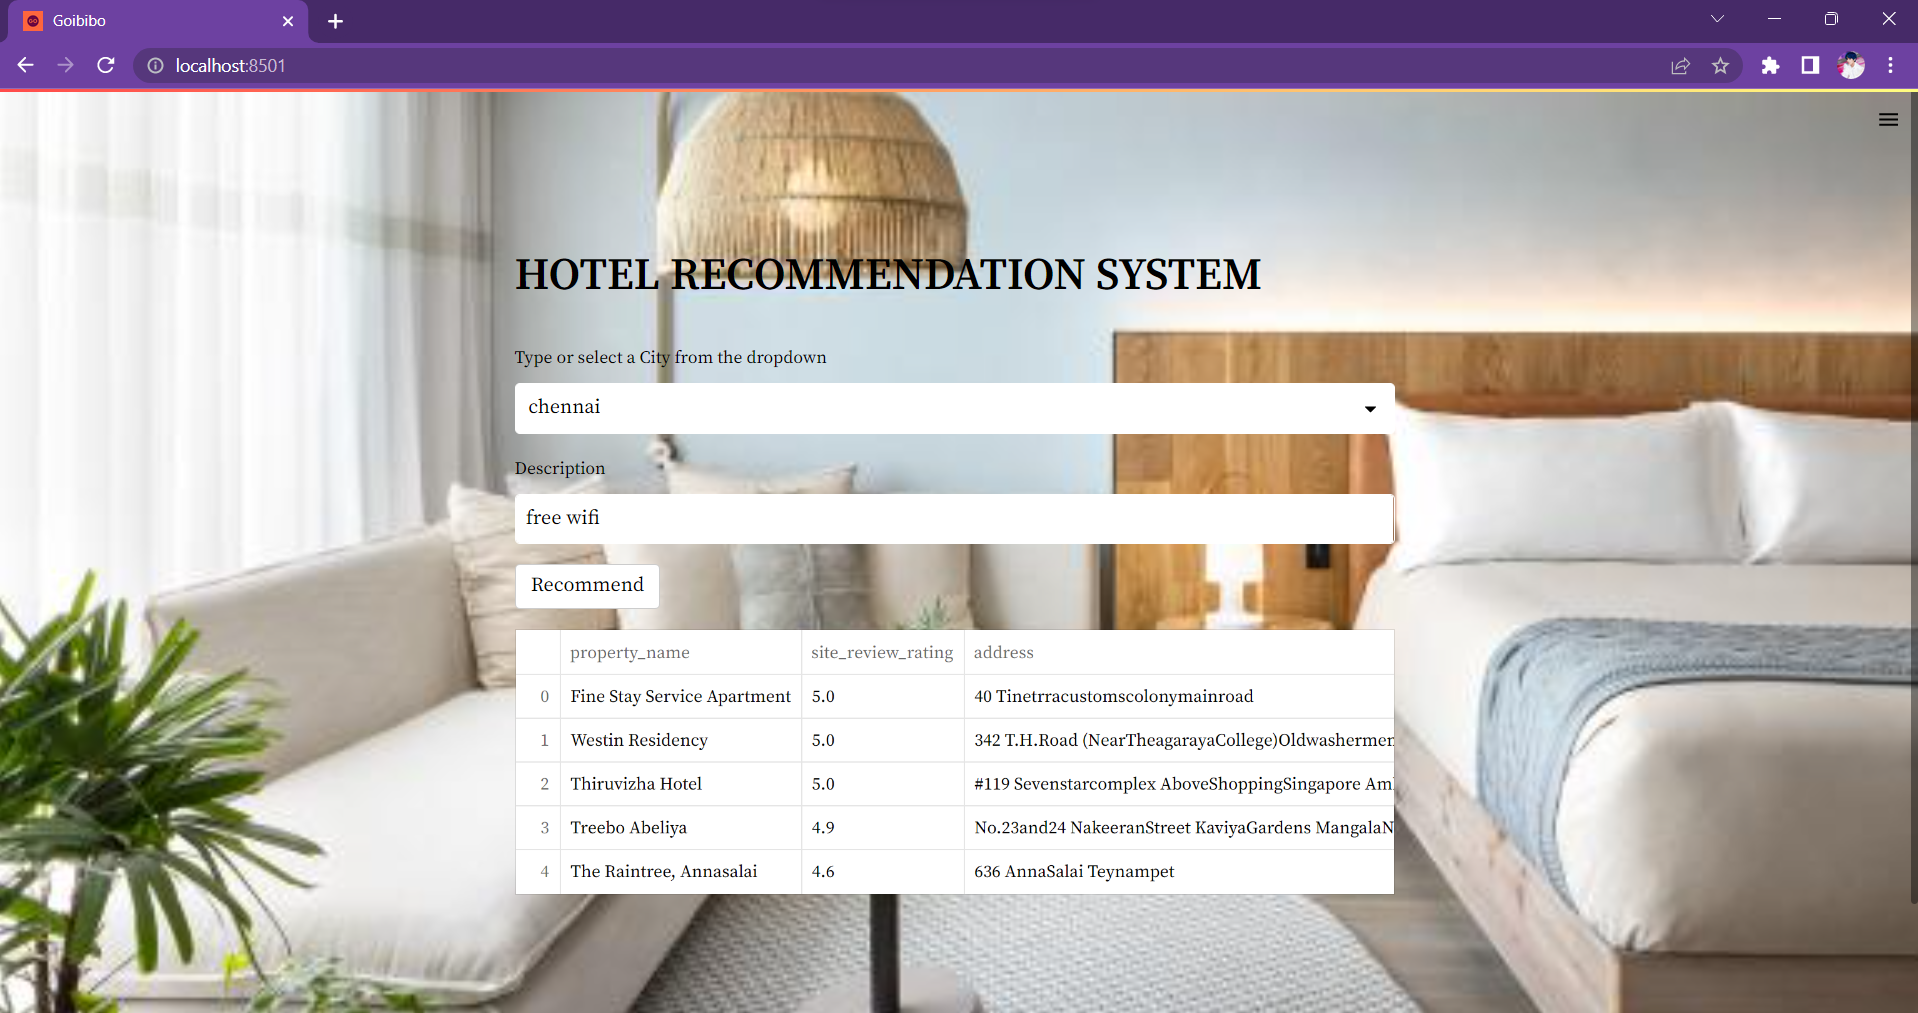

<h3>WORKING OF SYSTEM:</h3>

<li>User must selects the city and provides the preference of hotel which he need and clicks on Recommend Button.</li><br>
<li>The Recommendation model runs in the backend and will display a list of Hotels with SORTED based on highest ratings along with its address similar to user’s selection and Input.</li><br>
<li>As we can see in Example the User while selecting the City as Chennai and provides the description as ‘Free Wifi’, the system recommends first five list of hotels in Chennai with highest ratings first along with the hotel address.</li><br>
<b>Our Hotel Recommendation System is working successfully and provides the desired results as expected.</b>


# CONCLUSION

<li>Structured and raw data into deep offers new insights.</li><br>
<li>The model can capture the specific interests of a user, and can recommend niche items that very few other users are interested in.</li><br>
<li>This type of recommender system is hugely dependent on the inputs provided by users, some common examples included Google, Wikipedia, etc. For example, when a user searches for a group of keywords, then Google displays all the items consisting of those keywords.</li>


# FUTURE WORK

Can Implement the same model with different ML statergy using Collaborative based or Hybrid Based Recommender System